In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from keras.models import Sequential             #the Sequential module which is used for initializing our model.
from keras.layers import Convolution2D as c2d   #we’ll use for the first step of making the CNN that is the convolution step in which we add convolutional layers.
from keras.layers import MaxPooling2D           #the pooling step that will add our pooling layers .
from keras.layers import Flatten                #flattening
from keras.layers import Dense                  #this is the package we use to add the fully connected layer.
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import datasets
from sklearn.model_selection import train_test_split
from tqdm import tqdm #progresss bar 
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import os 
import shutil
import pandas as pd

In [2]:
import pandas as pd
data = '/content/drive/MyDrive/Damage Dataset/classes.csv'
full_data = pd.read_csv(data)

In [5]:
full_data.shape

(2407, 2)

In [51]:
train_image=[]
Y_arry=[]
for i in tqdm(range(2407)):
  try:
    path='/content/drive/MyDrive/Damage Dataset/building_damage'+full_data['filename'][i]
    Y_arry.append(full_data['classes'][i])
    img = image.load_img(path,target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
  except FileNotFoundError:
    try:
      img = image.load_img('/content/drive/MyDrive/Damage Dataset/building_damage/'+full_data['filename'][i],target_size=(400,400,3))
      Y_arry.append(full_data['classes'][i])
      img = image.img_to_array(img)
      img = img/255
      train_image.append(img)
    except FileNotFoundError:
      continue

      

100%|█████████▉| 2406/2407 [00:16<00:00, 142.76it/s]


TypeError: ignored

In [43]:
store=train_image

In [54]:
X_train=np.array(train_image)

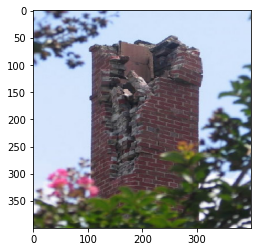

In [53]:
plt.imshow(X_train[6])

In [6]:
Y_train=np.array(full_data.drop(['filename'],axis=1))
Y_train=Y_train[:672]
Y_train.shape

(672, 1)

In [52]:
X_train.shape

(672, 400, 400, 3)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["0","1","2"])
encode=le.transform(Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [9]:
encode=encode.reshape(672,1)

In [55]:
X_train=X_train/255

In [11]:
cnn = Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2))])

In [12]:
#flatten
cnn.add(Flatten())

In [13]:
#Full connection
cnn.add(Dense(128, activation = 'relu'))    # hidden layer
cnn.add(Dense(64, activation = 'relu'))    
cnn.add(Dense(32, activation = 'relu'))    
cnn.add(Dense(1, activation = 'softmax')) 

In [14]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 614656)            0         
                                                                 
 dense (Dense)               (None, 128)               7

In [56]:
cnn.fit(X_train,encode)

21/21 [==============================] - 139s 7s/step - loss: 0.0000e+00 - accuracy: 0.2872


In [25]:
proba=cnn.predict(X_train)

21/21 [==============================] - 39s 2s/step


Mild Damage


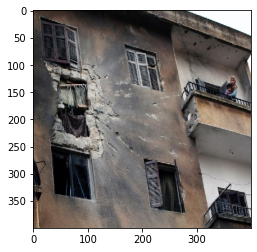

In [48]:
plt.imshow(X_train[10])
if(round(proba[10][0])==1):
  print("Mild Damage")
elif(round(proba[10][0])==2):
  print("Severe Damage")
else:
  print("Not Damage")
